### Simulating the PHYS 211 M&M lab --- Observing the Central Limit Theorem in action
The beginning of this notebook is a duplication of the notebook from the first M&M problem.

In [2]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Intro
+ 6 Colors: Yellow, Blue, Orange, Red, Green, and Blue
+ Assume 60 M&Ms in every bag
+ Assume equal probabilities (well mixed, large "reservoir")
+ Assume 24 students (bags) per section

### Part 1 (from prrevious problem)

To get started, sample one bag of M&Ms, and count the numberof brown M&Ms.<br>
Do this by generating 60 random integers from the set 0, 1, 2, 3, 4, 5, and let's say that "brown" = 0.


In [4]:
bag = stats.randint.rvs(0,6,size = 60)
print(bag)

[3 1 0 5 5 5 0 3 1 4 0 4 2 2 1 4 2 3 4 0 1 0 3 2 1 2 0 1 5 0 1 4 1 0 1 1 0
 5 2 5 3 4 0 1 2 4 0 1 0 4 5 3 3 5 0 3 5 0 2 0]


+ Count the number of each color in the bag using `np.bincount(bag)`. The first element in the array is the number of occurences of 0 in "bag," the second element is the number of occurences of 1, etc.

In [5]:
np.bincount(bag)

array([15, 12,  8,  8,  8,  9])

+ For our "brown" = 0 choice, the number of brown M&Ms is the first element in the array returned by `bincount`, or `np.bincount(bag)[0]`.

In [6]:
np.bincount(bag)[0]

15

+ Now sample many bags
+ Record number of brown M&Ms in each bag

In [7]:
# Long version of sampling many bags
nb = 24                     # number of bags 
data_section = np.zeros(nb) # array for data from a lab section
for i in range(nb):
    bag = stats.randint.rvs(0,6,size=60)
    data_section[i] = np.bincount(bag)[0]

data_section

array([12.,  4.,  9., 11., 18., 10.,  8.,  6., 10.,  7.,  8.,  9., 13.,
        7., 12.,  9., 10., 12., 10., 12.,  8., 18., 13., 17.])

In [46]:
# Concise version of sampling many bags
nb = 24            # number of bags
data_section = np.array([np.bincount(stats.randint.rvs(0,6,size=60))[0] for i in range(nb)])
data_section

array([11, 11,  5,  6, 13,  7, 10,  6,  8, 13,  7,  8, 11,  7,  6, 11, 11,
       12,  8, 12, 14,  9,  8, 16])

In [47]:
np.mean(data_section), np.std(data_section), np.std(data_section)/np.sqrt(len(data_section)-1)

(9.583333333333334, 2.8565227501671018, 0.5956261674917971)

#### Answer for part 1, the results from this single lab section:<br>
$\overline N = 9.6 \pm 0.6$

<IPython.core.display.Javascript object>


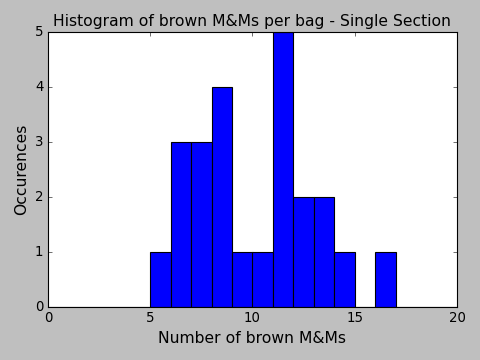

In [48]:
plt.figure()
nbins = 20
low = 0
high = 20
plt.hist(data_section,nbins,[low,high])
plt.xlim(0,20)
plt.title("Histogram of brown M&Ms per bag - Single Section")
plt.xlabel("Number of brown M&Ms")
plt.ylabel("Occurences");

### Part 2 -- New stuff:  Now we simulate data from 200 lab sections.

In [49]:
nb = 24    # Number of bags in a section
ns = 2000   # Number of sections in class
data_class = np.zeros(ns) # array for results from each section

In [50]:
for j in range(ns):
    data_section = np.zeros(nb)     # array for section data
    for i in range(nb):
        bag = stats.randint.rvs(0,6,size=60)
        data_section[i] = np.bincount(bag)[0]
    data_class[j] = np.mean(data_section)

In [51]:
np.mean(data_class), np.std(data_class)

(10.011979166666666, 0.591323027775076)

#### Historgram of section averages

<IPython.core.display.Javascript object>


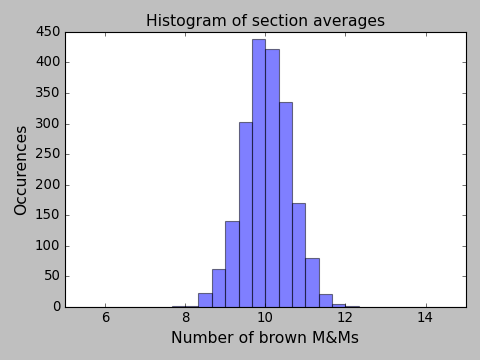

In [52]:
plt.figure()
nbins = 30
low = 5
high = 15
binwidth = (high-low)/nbins
plt.hist(data_class,nbins,[low,high],alpha=0.5)
plt.xlim(low,high)
plt.title("Histogram of section averages",fontsize=14)
plt.xlabel("Number of brown M&Ms")
plt.ylabel("Occurences");

#### Quantitative checks of prediction of Central Limit Theorem

The standard deviation of the number of brown M&Ms in a bag in an indvidual section (that 
was determined in Part 1 above) is $\sigma = 2.9$.  The Central Limit Theorem predicts that the 
standard deviation of the section averages (i.e., standard deviation of the mean) 
should be 

$$
\sigma_{\rm averages} = \frac{\sigma}{\sqrt{N}} = \frac{2.9}{\sqrt{24}} \simeq 0.59
$$

The standard deviation of the 2000 means I simulated is 0.59, which is consistent with 
that predicted by Central Limit Theorem.

We can also check the shape of the distribution of the means by comparing the results to 
the histrogram predicted by the Central Limit Theorem.

<IPython.core.display.Javascript object>


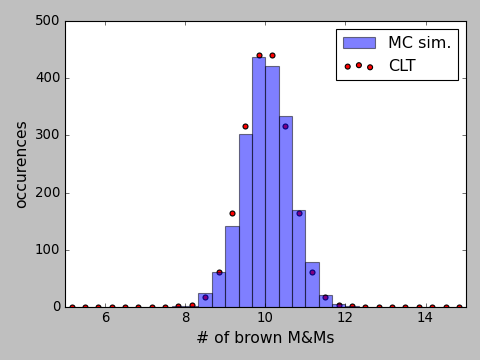

In [53]:
nbins = 30
low = 5
high = 15

plt.figure()
plt.xlabel("# of brown M&Ms")
plt.ylabel("occurences")
h_out = plt.hist(data_class, nbins, [low,high], alpha = 0.5, label='MC sim.')
plt.xlim(low,high);

x = np.zeros(len(h_out[1])-1)   # Array for mid-points of histogram bins
y = np.zeros(len(h_out[1])-1)   # Array for expected occurences from normal dist.
for i in range(len(x)):
    x[i] = (h_out[1][i+1] + h_out[1][i])/2
    y[i] = ns*(stats.norm.cdf(h_out[1][i+1],10,2.8/np.sqrt(nb)) -stats.norm.cdf(h_out[1][i],10,2.8/np.sqrt(nb)))
    
plt.scatter(x, y, c = 'red', label='CLT')
plt.legend();

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [54]:
%load_ext version_information

In [55]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 09:16:08 2020 EDT